In [1]:
import numpy as np
import matplotlib.pyplot as plt

file = np.loadtxt("Sun_track.txt")

In [2]:
def masses(x):
    # for input array of time values
    # calculate approximate M_sol
    # at those times in its life
    y = np.zeros_like(x)
    for i, time in enumerate(x):
        if (time <= 1.132e10):
            y[i] = 1
        elif (1.132e10 < time <= 1.1336e10):
            y[i] = 0.05 * (708.5 - time/(1.6e7))**(1/3) + .95
        elif (1.1336e10 < time <= 1.1463e10):
            y[i] =  -8**((time - 1.1463e10)/574511)/2.4 + .95
        elif (1.1463e10 < time):
            y[i] = 0.54
    return y

def lums(x):
    y = np.zeros_like(x)
    for i, time in enumerate(x):
        if (time <= 1.113e10):
            y[i] = 1.05
        elif (1.113e10 < time <= 1.1225e10):
            y[i] = 1.45 + ((1.45 - 1.1)/(1.1225e10 - 1.1135e10))*(time - 1.1225e10)
        elif (1.1225e10 < time <= 1.125e10):
            y[i] = 1.45
        elif (1.125 < time <= 1.1336e10):
            y[i] = 1.35 + .1*1.002**((time - 1.125e10)/58000)
        elif (1.1336e10 < time <= 1.142e10):
            y[i] = 1.673
        elif (1.142e10 < time <= 1.14397e10):
            y[i] = 3.198e-9*time - 34.85
        elif (1.14397e10 < time <= 1.14479e10):
            y[i] = 1.736 + 0.032*1.5**((time - 1.14455e10)/360000)
        elif (1.14479e10 < time <= 1.1462e10):
            y[i] = 2.15 + 0.00021*1.5**((time - 1.1444e10)/870000)
        elif (1.1462e10 < time <= 1.14632e10):
            y[i] = 3.5 + (.43/0.0001e10)*(time - 1.1463e10)
        elif (1.14632e10 < time <= 1.14636e10):
            y[i] = 2.3*((time - 1.1463e10)/45000)**(-0.3)
        elif (1.14636e10 < time <= 1.14654715e10):
            y[i] = .2 + ((.2 - 1.05)/(1.14654715e10 - 1.14636e10))*(time - 1.14654715e10)
        elif (1.14654715e10 < time):
            y[i] = .2
    return y

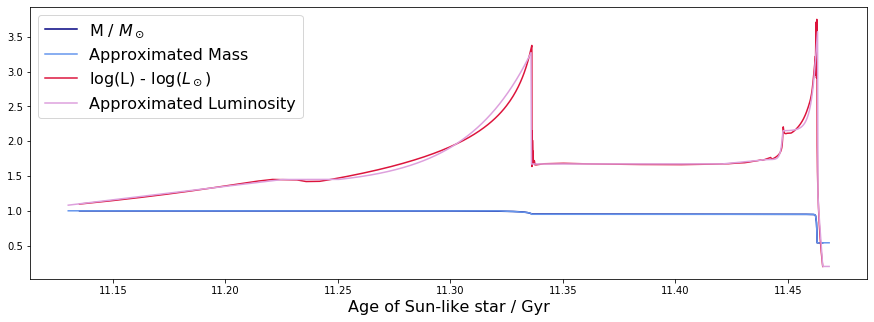

In [3]:
fig, ax = plt.subplots(figsize=(15,5))
times = np.logspace(10.0465, 10.0595, 2000)

m_sol = masses(times)
l_sol = lums(times)
ax.plot(file[500:,0]/1e9, file[500:,1], "navy") # mass
ax.plot(times/1e9,m_sol, "cornflowerblue")

ax.plot(file[500:,0]/1e9, file[500:,6], "crimson") # log_luminosity
ax.plot(times/1e9,l_sol, "plum")
ax.legend([r"M / $M_\odot$", "Approximated Mass", r"log(L) - log($L_\odot$)", "Approximated Luminosity"], fontsize=16, loc='upper left')
ax.set_xlabel("Age of Sun-like star / Gyr", fontsize=16)
fig.show()
fig.savefig("mass_lum_approximations.png", dpi=300)